In [1]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


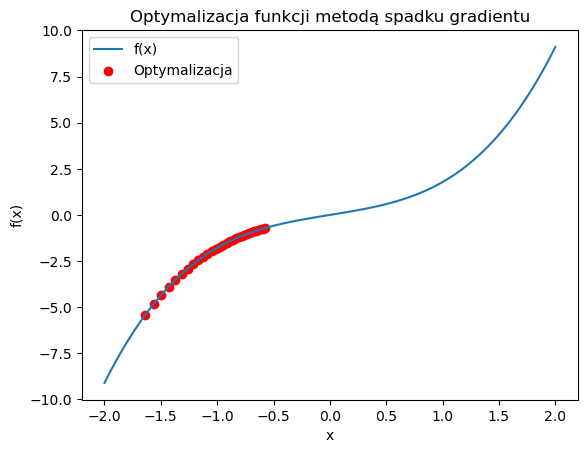

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# 1. Optymalizacja f(x) = arctan(x) + x^3 metodą spadku gradientu
def f(x):
    return np.arctan(x) + x**3

def grad_f(x):
    return (1 / (1 + x**2)) + 3*x**2

# Gradient Descent
x_init = np.random.uniform(-2, 2)
learning_rate = 0.01
iterations = 30
x_vals = [x_init]

for _ in range(iterations):
    grad = grad_f(x_vals[-1])
    if np.abs(grad) > 1e6:
        break
    x_new = x_vals[-1] - learning_rate * grad
    x_vals.append(x_new)

x_plot = np.linspace(-2, 2, 100)
plt.plot(x_plot, f(x_plot), label='f(x)')
plt.scatter(x_vals, f(np.array(x_vals)), color='red', label='Optymalizacja')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Optymalizacja funkcji metodą spadku gradientu")
plt.show()

In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3387 - loss: 1.2487 - val_accuracy: 0.3667 - val_loss: 0.9982
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4142 - loss: 1.0361 - val_accuracy: 0.5333 - val_loss: 0.8601
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5744 - loss: 0.9506 - val_accuracy: 0.6667 - val_loss: 0.7555
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6275 - loss: 0.8232 - val_accuracy: 0.7000 - val_loss: 0.6741
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6289 - loss: 0.7130 - val_accuracy: 0.7333 - val_loss: 0.6069
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6522 - loss: 0.6551 - val_accuracy: 0.7667 - val_loss: 0.5529
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7161 - loss: 0.6355 - val_accuracy: 0.8333 - val_loss: 0.5037
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.5418 - val_accuracy: 0.8667 - val_loss:

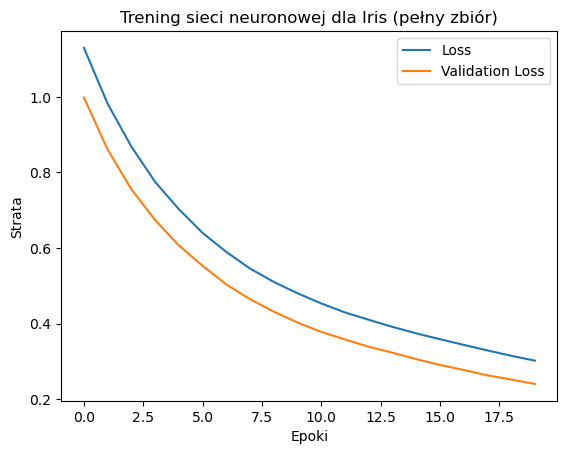

In [9]:
# 2. Sieć neuronowa do klasyfikacji pełnego zbioru Iris
from sklearn import datasets
dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

model = Sequential([
    Input(shape=(4,)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=5, verbose=1, validation_data=(X_test, y_test))

# Wizualizacja procesu uczenia
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend()
plt.title("Trening sieci neuronowej dla Iris (pełny zbiór)")
plt.show()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8093 - loss: 0.5498 - val_accuracy: 0.8800 - val_loss: 0.3350
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8982 - loss: 0.2837 - val_accuracy: 0.8887 - val_loss: 0.2958
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9146 - loss: 0.2362 - val_accuracy: 0.8935 - val_loss: 0.2903
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9254 - loss: 0.2049 - val_accuracy: 0.9040 - val_loss: 0.2584
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9350 - loss: 0.1775 - val_accuracy: 0.9113 - val_loss: 0.2588


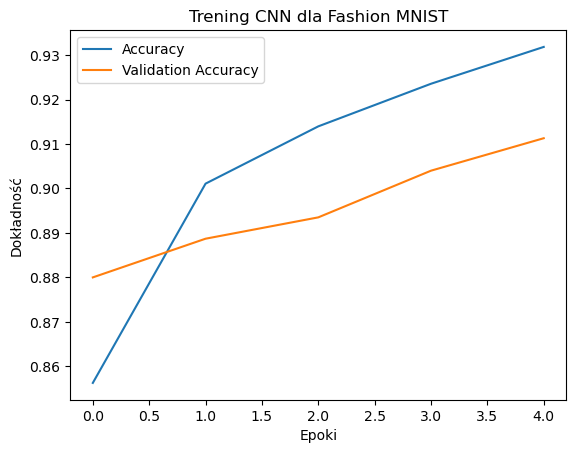

In [11]:
# 3. Sieć CNN dla Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

cnn_model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Wizualizacja treningu CNN
plt.plot(cnn_history.history['accuracy'], label='Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
plt.legend()
plt.title("Trening CNN dla Fashion MNIST")
plt.show()
